In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify

In [3]:
links=pd.read_csv("C:/Users/dell/Desktop/movie_internship/links.csv")
movies=pd.read_csv("C:/Users/dell/Desktop/movie_internship/movies.csv")
tag=pd.read_csv("C:/Users/dell/Desktop/movie_internship/tags.csv")
ratings=pd.read_csv("C:/Users/dell/Desktop/movie_internship/ratings.csv")

In [77]:
## note i'll not change anything in main dataset  

In [78]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [10]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
tag.head()


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [7]:
links.shape

(9742, 3)

## Identify Missing Values


In [8]:
links
links.dropna(inplace=True)
link=links.isna().sum()

In [9]:
print(link)

movieId    0
imdbId     0
tmdbId     0
dtype: int64


In [10]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [11]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [12]:
tag.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

# duplicate rows

In [13]:
links.duplicated().sum()

0

In [14]:
movies.duplicated().sum()

0

In [15]:
ratings.duplicated().sum()

0

In [16]:
tag.duplicated().sum()

0

# extract year from Movies Title

In [17]:
movies['title']

0                                Toy Story (1995)
1                                  Jumanji (1995)
2                         Grumpier Old Men (1995)
3                        Waiting to Exhale (1995)
4              Father of the Bride Part II (1995)
                          ...                    
9737    Black Butler: Book of the Atlantic (2017)
9738                 No Game No Life: Zero (2017)
9739                                 Flint (2017)
9740          Bungo Stray Dogs: Dead Apple (2018)
9741          Andrew Dice Clay: Dice Rules (1991)
Name: title, Length: 9742, dtype: object

In [18]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies['year']

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
9737    2017
9738    2017
9739    2017
9740    2018
9741    1991
Name: year, Length: 9742, dtype: object

In [19]:
## now i will remove year from title
movies['title']=movies['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)
movies

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,2017
9739,193585,Flint,Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,2018


In [31]:
## we can also do the same thing with a different method
df=movies.copy()
df['title']=df['title'].apply(lambda x:x.split("("))
def extract_title(x):
    if len(x)==2:
        return pd.Series([x[0].strip(),x[1].replace(')',' ').strip()])
    else:
        return pd.Series([x[0].strip()])
df        


,movieId,title,genres
0,1,"[Toy Story , 1995)]",Adventure|Animation|Children|Comedy|Fantasy
1,2,"[Jumanji , 1995)]",Adventure|Children|Fantasy
2,3,"[Grumpier Old Men , 1995)]",Comedy|Romance
3,4,"[Waiting to Exhale , 1995)]",Comedy|Drama|Romance
4,5,"[Father of the Bride Part II , 1995)]",Comedy
...,...,...,...
9737,193581,"[Black Butler: Book of the Atlantic , 2017)]",Action|Animation|Comedy|Fantasy
9738,193583,"[No Game No Life: Zero , 2017)]",Animation|Comedy|Fantasy
9739,193585,"[Flint , 2017)]",Drama
9740,193587,"[Bungo Stray Dogs: Dead Apple , 2018)]",Action|Animation


In [32]:
df[['new_title','year']]=df["title"].apply(extract_title)
df
df=df.drop(columns=["title"],axis=1)
df


,movieId,genres,new_title,year
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995
1,2,Adventure|Children|Fantasy,Jumanji,1995
2,3,Comedy|Romance,Grumpier Old Men,1995
3,4,Comedy|Drama|Romance,Waiting to Exhale,1995
4,5,Comedy,Father of the Bride Part II,1995
...,...,...,...,...
9737,193581,Action|Animation|Comedy|Fantasy,Black Butler: Book of the Atlantic,2017
9738,193583,Animation|Comedy|Fantasy,No Game No Life: Zero,2017
9739,193585,Drama,Flint,2017
9740,193587,Action|Animation,Bungo Stray Dogs: Dead Apple,2018


In [33]:
df[df['year']==0]


,movieId,genres,new_title,year


In [37]:
print(type(df['new_title']))

<class 'pandas.core.series.Series'>


In [38]:
df['year']=pd.to_numeric(df['year'],errors='coerce')
df['year'].fillna(0,inplace=True)
df['year']=df['year'].astype(int)
df

,movieId,genres,new_title,year
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995
1,2,Adventure|Children|Fantasy,Jumanji,1995
2,3,Comedy|Romance,Grumpier Old Men,1995
3,4,Comedy|Drama|Romance,Waiting to Exhale,1995
4,5,Comedy,Father of the Bride Part II,1995
...,...,...,...,...
9737,193581,Action|Animation|Comedy|Fantasy,Black Butler: Book of the Atlantic,2017
9738,193583,Animation|Comedy|Fantasy,No Game No Life: Zero,2017
9739,193585,Drama,Flint,2017
9740,193587,Action|Animation,Bungo Stray Dogs: Dead Apple,2018


In [44]:
## i will delete all movies who realese before 2000
df=df[df['year']>=2000]
df

,movieId,genres,new_title,year
2083,2769,Crime|Drama,"Yards, The",2000
2395,3177,Comedy,Next Friday,2000
2404,3190,Adventure|Sci-Fi|Thriller,Supernova,2000
2425,3225,Comedy|Romance,Down to You,2000
2460,3273,Comedy|Horror|Mystery|Thriller,Scream 3,2000
...,...,...,...,...
9736,193579,Documentary,Jon Stewart Has Left the Building,2015
9737,193581,Action|Animation|Comedy|Fantasy,Black Butler: Book of the Atlantic,2017
9738,193583,Animation|Comedy|Fantasy,No Game No Life: Zero,2017
9739,193585,Drama,Flint,2017


## change Timestamp in tag and rating column 

In [46]:
tag.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [49]:
tag['date']=pd.to_datetime(tag['timestamp'],unit='s')

In [52]:
tag.head()

,userId,movieId,tag,timestamp,date
0,2,60756,funny,1445714994,2015-10-24 19:29:54
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56
2,2,60756,will ferrell,1445714992,2015-10-24 19:29:52
3,2,89774,Boxing story,1445715207,2015-10-24 19:33:27
4,2,89774,MMA,1445715200,2015-10-24 19:33:20


In [13]:
ratings['date']=pd.to_datetime(ratings["timestamp"],unit='s')

In [17]:
ratings.drop('timestamp',axis=1,inplace=True)

# convert timestamp to human readable format

In [21]:
ratings['year']=pd.to_datetime(ratings["date"],unit='s').dt.year
ratings['date']=pd.to_datetime(ratings["date"],unit='s').dt.date

In [22]:
ratings.head(2)

,userId,movieId,rating,date,year
0,1,1,4.0,2000-07-30,2000
1,1,3,4.0,2000-07-30,2000


In [ ]:
tag.sample(10)

## Convert the genres column in movies.csv into a list of genres.

In [174]:
movies["genres"]=movies["genres"].apply(lambda x:x.split('|'))

In [175]:
movies.sample()

,movieId,title,genres
5098,8057,Sweet Bird of Youth (1962),[Drama]


## Create a consistent format for multi-word tags

In [94]:
tag.head()

,userId,movieId,tag,Date
0,2,60756,funny,2015-10-24 19:29:54
1,2,60756,Highly quotable,2015-10-24 19:29:56
2,2,60756,will ferrell,2015-10-24 19:29:52
3,2,89774,Boxing story,2015-10-24 19:33:27
4,2,89774,MMA,2015-10-24 19:33:20


In [99]:
tag['tag']=tag["tag"].apply(lambda x:x.replace(" ","_"))
tag['tag']=tag["tag"].apply(lambda x:x.replace("-","_"))
tag.sample(5)

,userId,movieId,tag,Date
1784,474,3386,president,2006-01-13 22:38:54
121,62,27660,sci_fi,2018-05-05 21:08:11
934,424,79132,visually_appealing,2016-03-13 04:55:14
3034,567,5673,unique,2018-05-02 17:37:17
1521,474,1954,boxing,2006-01-13 22:34:31


## Remove movies released before a certain year (e.g., 1900).


In [28]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'date', 'year'], dtype='object')

In [31]:
ratings['year'].max()

2018

In [37]:
ratings=ratings[ratings['year']>=2000]

In [39]:
ratings['year'].max()

2018

In [45]:
tag.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


# Remove movies with no associated ratings or tags.

In [54]:
movies_with_tag=movies[movies['movieId'].isin(tag['movieId'])]

In [56]:
movies_with_tag.count()

movieId    1572
title      1572
genres     1572
dtype: int64

In [57]:
movies_with_ratings=movies[movies['movieId'].isin(ratings['movieId'])]

In [58]:
movies_with_ratings.count()

movieId    9652
title      9652
genres     9652
dtype: int64

In [69]:
## movies with both rating and tag
movies_with_both=movies_with_ratings[movies_with_ratings['movieId'].isin(movies_with_tag['movieId'])]

In [70]:
movies_with_both.count()

movieId    1553
title      1553
genres     1553
dtype: int64

# ensure all movies is in link table


In [73]:
links.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

In [74]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [86]:
movies_with_link=movies[movies['movieId'].isin(links['movieId'])]:

In [89]:
movies_with_link.count()

movieId    9742
title      9742
genres     9742
dtype: int64

In [94]:
if(movies_with_link['movieId'].count() == links['movieId'].count()):
    print("All movies of links.csv are exist in Movies.csv")
else:
    print(f"Only {movies_with_links.count()} are present in movies.csv")

All movies of links.csv are exist in Movies.csv


# EDA

In [95]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [122]:
## Identify the top 10 most-rated movies
## these are movies who have most rating count
rating_count=ratings['movieId'].value_counts().head(10).reset_index()

df=movies[movies['movieId'].isin(rating_count['movieId'])]
df=pd.merge(df,rating_count,on='movieId')
df

,movieId,title,genres,count
0,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,213
1,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,211
2,318,"Shawshank Redemption, The (1994)",Crime|Drama,235
3,356,Forrest Gump (1994),Comedy|Drama|Romance|War,242
4,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,201
5,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,189
6,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,266
7,2858,American Beauty (1999),Drama|Romance,194
8,2959,Fight Club (1999),Action|Crime|Drama|Thriller,216
9,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198


In [216]:

##Examine the average rating for each genre
merge_df=pd.merge(movies,ratings,on='movieId')
merge_df = merge_df.explode('genres')
avg_rating=merge_df.groupby('genres')['rating'].mean()

In [146]:
avg_rating

genres
(no genres listed)    3.489362
Action                3.439938
Adventure             3.497946
Animation             3.620989
Children              3.391504
Comedy                3.367150
Crime                 3.658972
Documentary           3.790529
Drama                 3.643599
Fantasy               3.482903
Film-Noir             3.918936
Horror                3.241690
IMAX                  3.602186
Musical               3.541933
Mystery               3.624733
Romance               3.483789
Sci-Fi                3.450455
Thriller              3.479897
War                   3.770146
Western               3.579821
Name: rating, dtype: float64

In [217]:
avg_rating.reset_index()


,genres,rating
0,(no genres listed),3.489362
1,Action,3.439938
2,Adventure,3.497946
3,Animation,3.620989
4,Children,3.391504
5,Comedy,3.367150
6,Crime,3.658972
7,Documentary,3.790529
8,Drama,3.643599
9,Fantasy,3.482903


# Analyze the most common genres.



In [174]:
genres=movies


In [189]:
genres=genres.explode('genres')
common_genres=genres['genres'].value_counts().reset_index()

In [190]:
common_genres


,genres,count
0,Drama,4361
1,Comedy,3756
2,Thriller,1894
3,Action,1828
4,Romance,1596
5,Adventure,1263
6,Crime,1199
7,Sci-Fi,980
8,Horror,978
9,Fantasy,779


# Avg rating of each genres

In [192]:
df=movies.copy()

In [55]:
df=df.explode('genres')
r_genres=pd.merge(df,ratings,on='movieId')
a=r_genres.groupby('genres')['rating'].mean().reset_index()
a['rating']=a['rating'].round()
a

,genres,rating
0,(no genres listed),3.0
1,Action,3.0
2,Action|Adventure,4.0
3,Action|Adventure|Animation,4.0
4,Action|Adventure|Animation|Children,3.0
...,...,...
946,Sci-Fi|Thriller,3.0
947,Sci-Fi|Thriller|IMAX,4.0
948,Thriller,3.0
949,War,4.0


In [219]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'date', 'year'], dtype='object')

# Avg rating per movie


df=movies.copy()
avg_rating=pd.merge(df,ratings,on="movieId")
avg_rating=avg_rating.groupby('title')['rating'].mean().reset_index()

In [76]:
avg_rating['rating']=avg_rating['rating'].round()
a=avg_rating.sort_values(by='rating',ascending=False)
a


,title,rating
8414,The Big Bus (1976),5.0
9550,"Woman Is a Woman, A (femme est une femme, Une)...",5.0
1216,Blue Planet II (2017),5.0
5131,Little Murders (1971),5.0
3370,George Carlin: Back in Town (1996),5.0
...,...,...
3807,"Haunted House 2, A (2014)",0.0
3498,God's Not Dead (2014),0.0
6956,Raising Cain (1992),0.0
3506,Gods of Egypt (2016),0.0


# Data Visualization

## Create a histogram of movie ratings

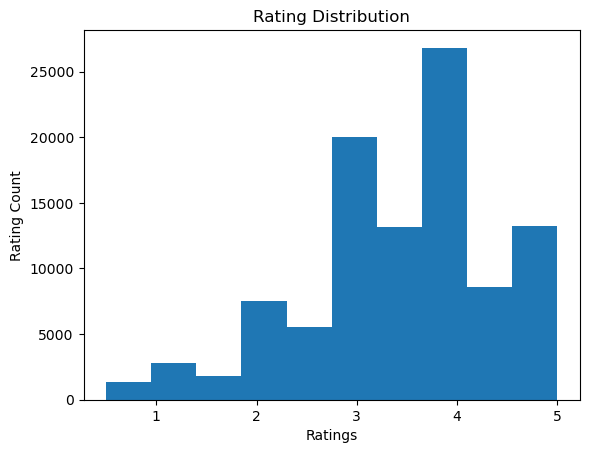

In [9]:
plt.hist(ratings['rating'])
plt.title('Rating Distribution')
plt.xlabel('Ratings')
plt.ylabel('Rating Count')
plt.show()

## Create a bar plot for the top 10 most common genres

In [32]:
df=movies.copy()
df['genres']=df['genres'].apply(lambda x : x.split('|'))
top_10=df.explode('genres')
new_df=top_10['genres'].value_counts().reset_index().head(10)
new_df

,genres,count
0,Drama,4361
1,Comedy,3756
2,Thriller,1894
3,Action,1828
4,Romance,1596
5,Adventure,1263
6,Crime,1199
7,Sci-Fi,980
8,Horror,978
9,Fantasy,779


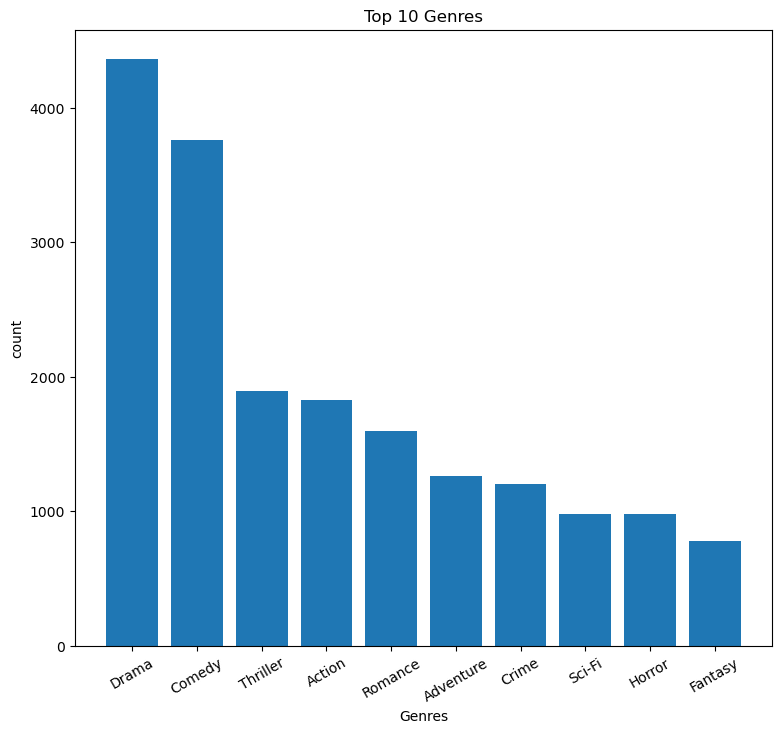

In [44]:
plt.figure(figsize=(9,8))
plt.bar(new_df['genres'],new_df['count'])
plt.title('Top 10 Genres')
plt.xlabel('Genres')
plt.ylabel('count')
plt.xticks(rotation=30)
plt.show()

## Generate a pie chart of ratings distribution.

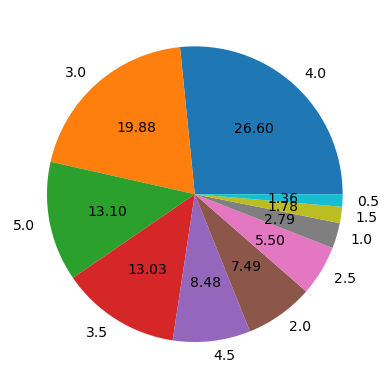

In [49]:
df=ratings['rating'].value_counts().reset_index()
plt.pie(df['count'],labels=df['rating'],autopct='%0.2f')
plt.show()

## Generate a bar plot for the most active users

In [74]:
df=ratings['userId'].value_counts().reset_index().head(10)
df['userId']=df['userId'].astype(str)
df


,userId,count
0,414,2698
1,599,2478
2,474,2108
3,448,1864
4,274,1346
5,610,1302
6,68,1260
7,380,1218
8,606,1115
9,288,1055


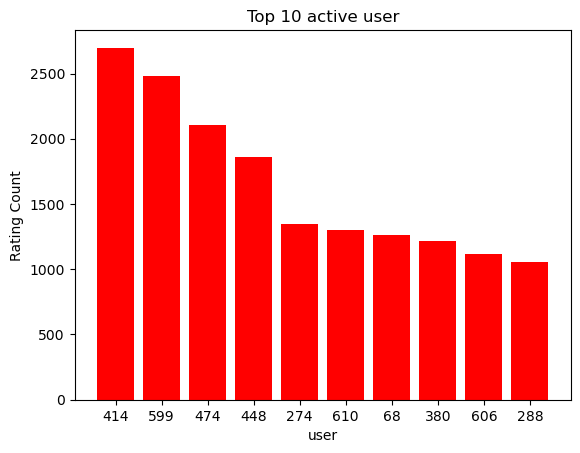

In [85]:
plt.bar(df['userId'],df['count'],color='red')
plt.title('Top 10 active user')
plt.xlabel('user')
plt.ylabel('Rating Count')
plt.show()

## Create a bar plot for the top 10 most rated movies

In [92]:
df=movies.copy()
df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [123]:
df=movies.copy()

In [147]:
new_df=pd.DataFrame(ratings.groupby('movieId')['rating'].mean().round(2).reset_index())
my_df = pd.merge(new_df,movies,on='movieId',how='left')
new_df

,movieId,rating
0,1,3.92
1,2,3.43
2,3,3.26
3,4,2.36
4,5,3.07
...,...,...
9719,193581,4.00
9720,193583,3.50
9721,193585,3.50
9722,193587,3.50


In [159]:
my_df=my_df.sort_values(by='rating',ascending=False)
my_df=my_df[['movieId','rating','title']].reset_index()
my_df=my_df.drop('index',axis=1)
my_df.head(10)
## this question can't be vizualize cause there are many movie with same TOP rating

,movieId,rating,title
0,69860,5.0,Eichmann (2007)
1,172585,5.0,Karlson Returns (1970)
2,172577,5.0,Last Year's Snow Was Falling (1983)
3,172793,5.0,Vovka in the Kingdom of Far Far Away (1965)
4,172875,5.0,A Detective Story (2003)
5,147328,5.0,The Adventures of Sherlock Holmes and Dr. Wats...
6,159811,5.0,The Bremen Town Musicians (1969)
7,131610,5.0,Willy/Milly (1986)
8,131237,5.0,What Men Talk About (2010)
9,131130,5.0,Tom and Jerry: A Nutcracker Tale (2007)


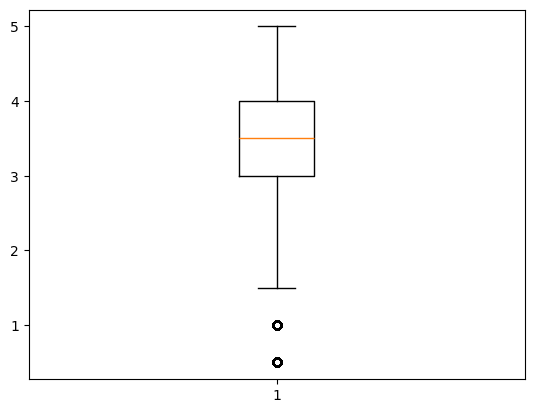

In [162]:
plt.boxplot(x=ratings['rating'])
plt.show()

In [194]:
movies=movies.explode('genres')

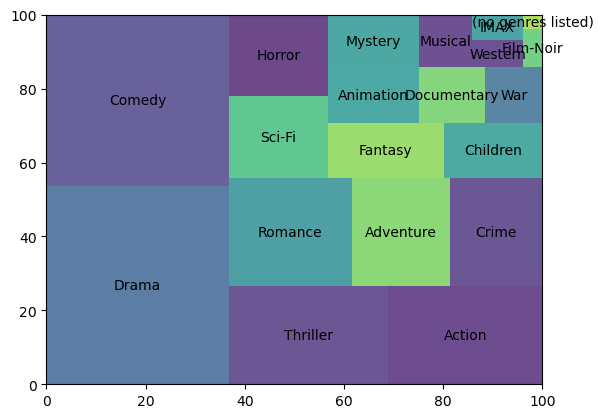

In [195]:
g_count=movies['genres'].value_counts().reset_index()
g_count.columns=['genres','count']
squarify.plot(sizes=g_count['count'],label=g_count['genres'],alpha=0.8)
plt.show()

## Descriptive Statistics

## Calculate the mean rating of all movies

In [41]:
df=ratings.copy()

df.groupby('movieId')['rating'].mean().round(2).reset_index()


,movieId,rating
0,1,3.92
1,2,3.43
2,3,3.26
3,4,2.36
4,5,3.07
...,...,...
9719,193581,4.00
9720,193583,3.50
9721,193585,3.50
9722,193587,3.50


## Determine the mode of ratings.

In [42]:
ratings['rating'].mode()

0    4.0
Name: rating, dtype: float64

##  Calculate the standard deviation of ratings.

In [43]:
ratings['rating'].std()

1.0425292390605359

## Find the variance of ratings

In [44]:
ratings['rating'].var()

1.08686721429614

In [49]:
q1=ratings['rating'].quantile(0.25)
q1
q3=ratings['rating'].quantile(0.75)
iqr=q3-q1
iqr


1.0

## Determine the skewness of the rating distribution

In [50]:
ratings['rating'].skew()

-0.6371993892529214

## Calculate the kurtosis of the rating distribution

In [51]:
ratings['rating'].kurt()

0.12331407123922622

## Calculate the mean rating per genre

In [56]:
df=movies.copy()
df['genres']=df['genres'].apply(lambda x:x.split('|'))
df=df.explode('genres')
df

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
...,...,...,...
9738,193583,No Game No Life: Zero (2017),Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Animation


In [58]:
g_avg=pd.merge(ratings,df,on='movieId')
g_avg


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure
1,1,1,4.0,964982703,Toy Story (1995),Animation
2,1,1,4.0,964982703,Toy Story (1995),Children
3,1,1,4.0,964982703,Toy Story (1995),Comedy
4,1,1,4.0,964982703,Toy Story (1995),Fantasy
...,...,...,...,...,...,...
274475,610,160836,3.0,1493844794,Hazard (2005),Drama
274476,610,160836,3.0,1493844794,Hazard (2005),Thriller
274477,610,163937,3.5,1493848789,Blair Witch (2016),Horror
274478,610,163937,3.5,1493848789,Blair Witch (2016),Thriller


In [61]:
g_avg.groupby('genres')['rating'].mean().reset_index().round(2)

,genres,rating
0,(no genres listed),3.49
1,Action,3.45
2,Adventure,3.51
3,Animation,3.63
4,Children,3.41
5,Comedy,3.38
6,Crime,3.66
7,Documentary,3.80
8,Drama,3.66
9,Fantasy,3.49


## Calculate the median rating per genre.

In [62]:
g_avg.groupby('genres')['rating'].median().reset_index().round(2)

,genres,rating
0,(no genres listed),3.5
1,Action,3.5
2,Adventure,3.5
3,Animation,4.0
4,Children,3.5
5,Comedy,3.5
6,Crime,4.0
7,Documentary,4.0
8,Drama,4.0
9,Fantasy,3.5


## Calculate the standard deviation of ratings per genre

In [64]:
g_avg.groupby('genres')['rating'].std().reset_index().round(2)

,genres,rating
0,(no genres listed),1.22
1,Action,1.05
2,Adventure,1.03
3,Animation,0.97
4,Children,1.06
5,Comedy,1.07
6,Crime,0.99
7,Documentary,0.82
8,Drama,0.98
9,Fantasy,1.04


# Time series analysis

## Analyze trends in the number of ratings over time


In [107]:
ratings['timestamp']=pd.to_datetime(ratings['timestamp'],unit='s')
ratings['year']=ratings['timestamp'].dt.year
ratings['month']=ratings['timestamp'].dt.month
ratings['date']=ratings['timestamp'].dt.day
ratings

,userId,movieId,rating,timestamp,year,month,date
0,1,1,4.0,2000-07-30 18:45:03,2000,7,30
1,1,3,4.0,2000-07-30 18:20:47,2000,7,30
2,1,6,4.0,2000-07-30 18:37:04,2000,7,30
3,1,47,5.0,2000-07-30 19:03:35,2000,7,30
4,1,50,5.0,2000-07-30 18:48:51,2000,7,30
...,...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,2017,5,3
100832,610,168248,5.0,2017-05-03 22:21:31,2017,5,3
100833,610,168250,5.0,2017-05-08 19:50:47,2017,5,8
100834,610,168252,5.0,2017-05-03 21:19:12,2017,5,3


In [98]:
df=ratings.groupby('year')['rating'].mean().reset_index().round(2)


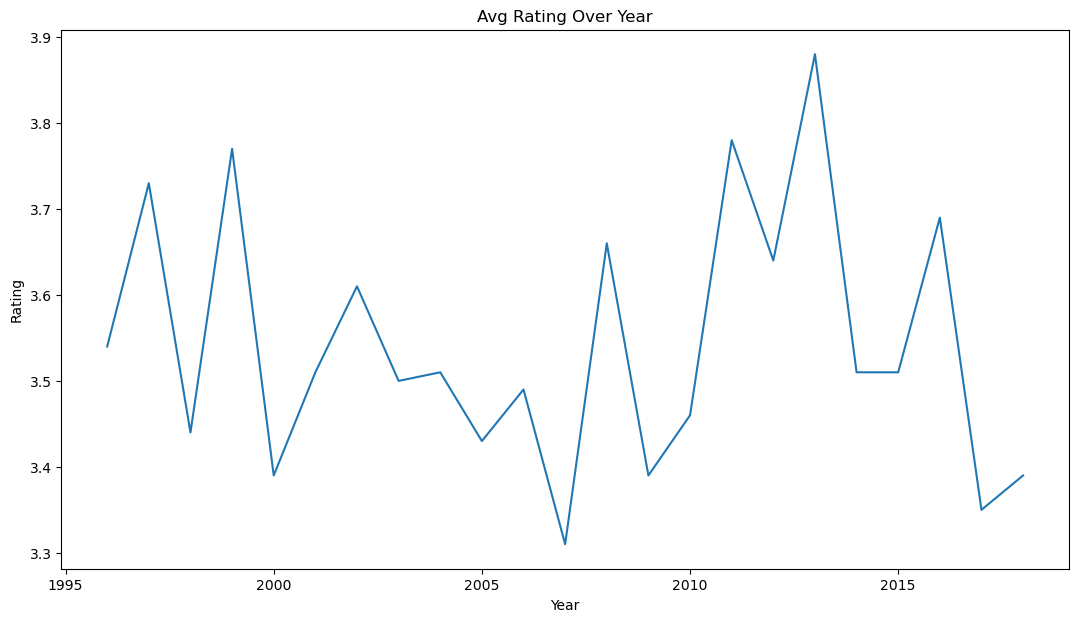

In [90]:
plt.figure(figsize=(13,7))
plt.plot(df['year'],df['rating'])
plt.title('Avg Rating Over Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

In [103]:
df2=ratings.groupby('month')['rating'].mean().reset_index().round(2)
df2

,month,rating
0,1,3.50
1,2,3.35
2,3,3.46
3,4,3.61
4,5,3.45
5,6,3.42
6,7,3.64
7,8,3.36
8,9,3.60
9,10,3.51


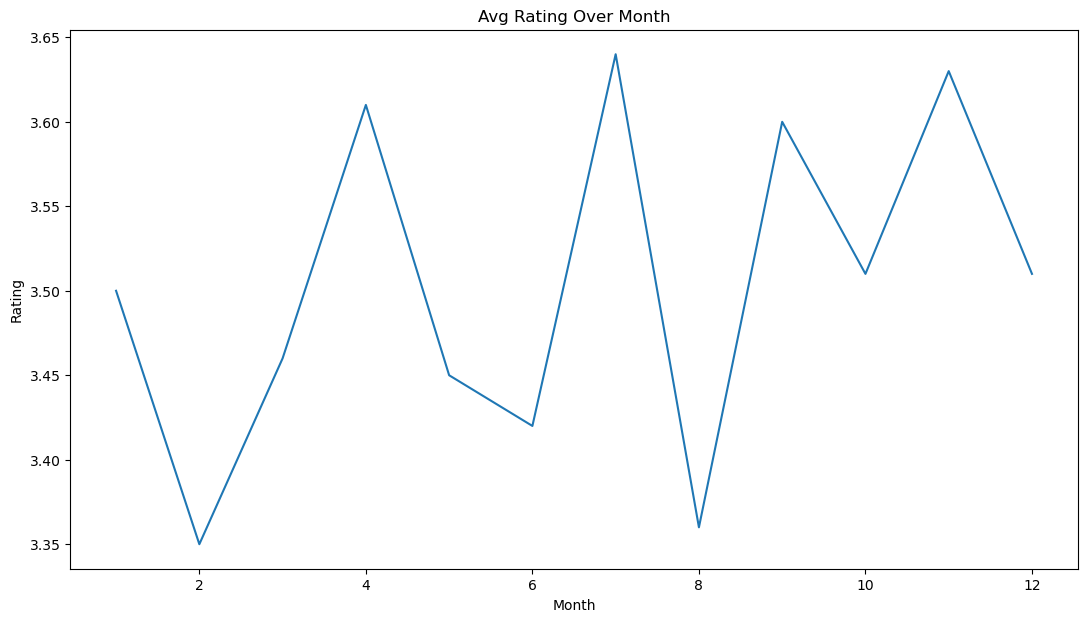

In [102]:
plt.figure(figsize=(13,7))
plt.plot(df2['month'],df2['rating'])
plt.title('Avg Rating Over Month')
plt.xlabel('Month')
plt.ylabel('Rating')
plt.show()

In [111]:
df3=ratings.groupby('date')['rating'].mean().reset_index().round(2)
df2


,month,rating
0,1,3.50
1,2,3.35
2,3,3.46
3,4,3.61
4,5,3.45
5,6,3.42
6,7,3.64
7,8,3.36
8,9,3.60
9,10,3.51


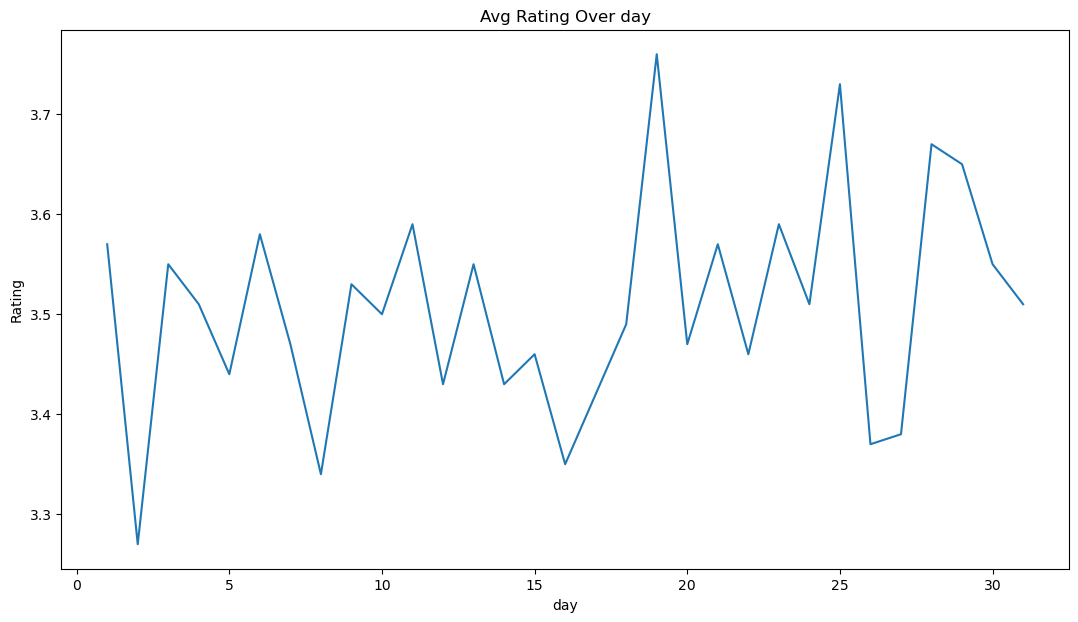

In [113]:
plt.figure(figsize=(13,7))
plt.plot(df3['date'],df3['rating'])
plt.title('Avg Rating Over day')
plt.xlabel('day')
plt.ylabel('Rating')
plt.show()

## Calculate and analyze rating frequency over time.

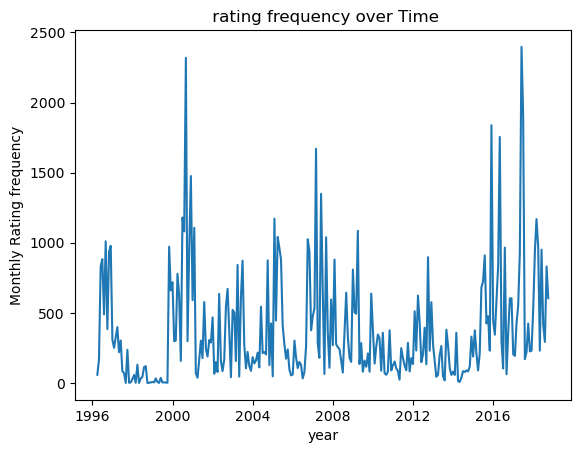

In [123]:

df=ratings.copy()
ratings['timestamp']=pd.to_datetime(ratings['timestamp'],unit='s')
rating_frequency=df.resample('M',on="timestamp").size()
plt.plot(rating_frequency.index,rating_frequency)
plt.title(' rating frequency over Time')
plt.xlabel('year')
plt.ylabel('Monthly Rating frequency')

plt.show()